In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

In [93]:
def flujo(t):
    B0=0.05
    f=7
    O=3.5
    r=(25/2)/100
    return (np.pi*r**2)*B0*np.cos(O*t)*np.cos(2*np.pi*f*t)

In [94]:
def corriente(t):
    B0=0.05
    f=7
    O=3.5
    r=(25/2)/100
    return (1/1.75)*(np.pi*r**2)*B0*(O*np.sin(O*t)*np.cos(2*np.pi*f*t)+2*np.pi*f*np.cos(O*t)*np.sin(2*np.pi*f*t))


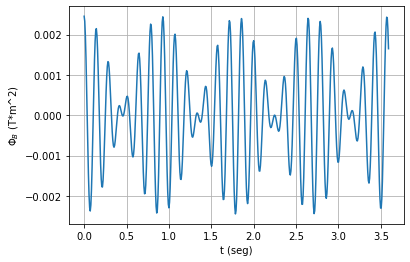

In [95]:
T=(2*np.pi/3.5) #El periodo del bucle corresponde al de la onda más lenta
t=np.linspace(0,2*T,500)
Phi=flujo(t)
plt.plot(t,Phi)
plt.xlabel('t (seg)')
plt.ylabel('$\Phi_B$ (T*m^2)')
plt.grid()

In [96]:
def Derivada(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

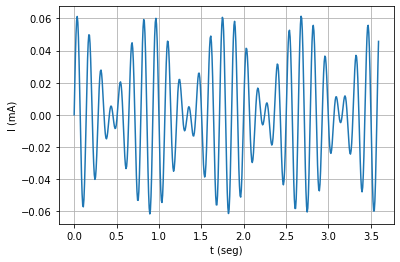

In [97]:
dPhi=Derivada(flujo,t)
I=(-1/1.750)*dPhi #Funcion discreta
Corriente=corriente(t) #Funcion continua
plt.plot(t,Corriente)
plt.xlabel('t (seg)')
plt.ylabel('I (mA)')
plt.grid()

In [98]:
def Raices_Biseccion_Disc(func, x, tol=1e-6, max_iterations=100):
    izq=0
    der=len(x)-1
    roots = []
    it=0
    while it<max_iterations:
        mid = (izq + der) // 2
        mid_value = func[mid]

        if abs(mid_value) < tol:
            roots.append(x[mid])

        if mid_value < 0:
            izq = mid
        else:
            der = mid

        if izq > der:
            break

    return roots

In [99]:
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-8):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            # Criterio de parada
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
    
    if it == itmax:
        return False
    else:
        return xn

In [100]:
def GetAllRoots(x, tolerancia=6):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonMethod(corriente,Derivada,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots and x[0]<=croot <=x[-1]:
                Roots = np.append(Roots,croot)
                
    Roots.sort() #Organiza la lista de forma ascendente
    
    return Roots

In [101]:
raices = GetAllRoots(t)
len(raices)

55

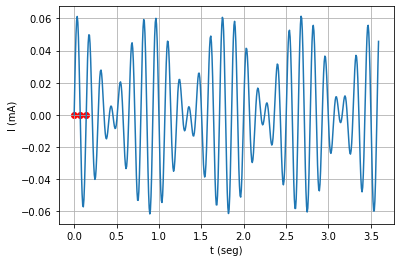

In [106]:
plt.plot(t,Corriente)
plt.scatter(raices[:3],corriente(raices[:3]), color='r')
plt.xlabel('t (seg)')
plt.ylabel('I (mA)')
plt.grid()

In [107]:
print(raices[:3])

[0.       0.07097  0.141877]


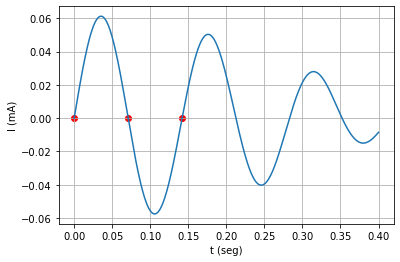

In [108]:
t2=np.linspace(0,0.4,500)
Corriente2=corriente(t2)
plt.plot(t2,Corriente2)
plt.scatter(raices[:3],corriente(raices[:3]), color='r')
plt.xlabel('t (seg)')
plt.ylabel('I (mA)')
plt.grid()
